# Tarea 5. Construyendo la frontera de mínima varianza para dos activos.

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/0/08/Pareto_Efficient_Frontier_for_the_Markowitz_Portfolio_selection_problem..png" width="600px" height="400px" />

**Resumen.**
> En esta tarea, construirás la frontera de mínima varianza para dos activos riesgosos usando los datos de mercados internacionales que usamos en la clase 10.

> Construirás portafolios que consisten de dos activos riesgosos, graficarás la frontera de mínima varianza y encontrarás el portafolio de mínima varianza. Repetirás luego el ejercicio para otro par de activos y compararás los beneficios de diversificación en cada caso.

> Por favor, revisar la clase 10 para los datos. 

**Criterio de revisión.**
> Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.

**Antes de comenzar.**
> Por favor, copiar y pegar este archivo en otra ubicación. Antes de comenzar, nombrarlo *Tarea5_ApellidoNombre*, sin acentos y sin espacios; por ejemplo, en mi caso el archivo se llamaría *Tarea5_JimenezEsteban*. Resolver todos los puntos en dicho archivo y subir en este espacio.

## 1. Datos (10 puntos)

Copiar y pegar los datos de rendimientos esperados, volatilidades y correlaciones de mercados internacionales brindados en la Clase 10.

1. Mostrar los DataFrame con los datos (5 puntos).
2. Graficar en el espacio de rendimiento esperado contra volatilidad cada uno de los activos (5 puntos).

In [18]:
# Importamos pandas y numpy y matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Importar el módulo optimize
import scipy.optimize as opt

In [19]:
# Resumen en base anual de rendimientos esperados y volatilidades
annual_ret_summ = pd.DataFrame(columns=['EU', 'RU', 'Francia', 'Alemania', 'Japon'], index=['Media', 'Volatilidad'])
annual_ret_summ.loc['Media'] = np.array([0.1355, 0.1589, 0.1519, 0.1435, 0.1497])
annual_ret_summ.loc['Volatilidad'] = np.array([0.1535, 0.2430, 0.2324, 0.2038, 0.2298])

annual_ret_summ.round(4)

,EU,RU,Francia,Alemania,Japon
Media,0.1355,0.1589,0.1519,0.1435,0.1497
Volatilidad,0.1535,0.243,0.2324,0.2038,0.2298


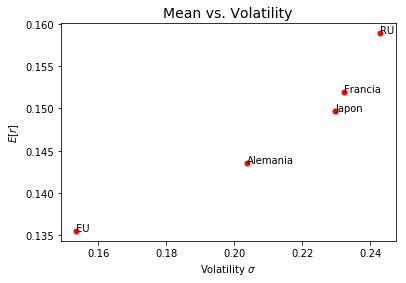

In [20]:
x = annual_ret_summ.loc['Volatilidad'].values
y = annual_ret_summ.loc['Media'].values
plt.figure(figsize=(6,4))
#Axis labels
plt.title('Mean vs. Volatility',fontsize=14)
plt.xlabel('Volatility $\sigma$')
plt.ylabel('$E[r]$')

plt.text(x[0],y[0],'EU')
plt.text(x[1],y[1],'RU')
plt.text(x[2],y[2],'Francia')
plt.text(x[3],y[3],'Alemania')
plt.text(x[4],y[4],'Japon')

#Plot
plt.plot(x,y,'ro',ms=5)
plt.show()

In [37]:
# Matriz de correlación
corr = pd.DataFrame(data= np.array([[1.0000, 0.5003, 0.4398, 0.3681, 0.2663],
                                    [0.5003, 1.0000, 0.5420, 0.4265, 0.3581],
                                    [0.4398, 0.5420, 1.0000, 0.6032, 0.3923],
                                    [0.3681, 0.4265, 0.6032, 1.0000, 0.3663],
                                    [0.2663, 0.3581, 0.3923, 0.3663, 1.0000]]),
                    columns=annual_ret_summ.columns, index=annual_ret_summ.columns)
corr.round(4)

,EU,RU,Francia,Alemania,Japon
EU,1.0000,0.5003,0.4398,0.3681,0.2663
RU,0.5003,1.0000,0.5420,0.4265,0.3581
Francia,0.4398,0.5420,1.0000,0.6032,0.3923
Alemania,0.3681,0.4265,0.6032,1.0000,0.3663
Japon,0.2663,0.3581,0.3923,0.3663,1.0000


In [38]:
r12 = corr['RU']['Japon']
r12

0.35809999999999997

## 2. Portafolios con Japón y Reino Unido (30 puntos)

Usando los datos del punto anterior:

1. Construya la frontera de mínima varianza que representa las posibles combinaciones de portafolios que se pueden crear con los mercados Japoneses y del Reino Unido como activos riesgosos. Puedes pensar en ellos como índices de mercado. Reportar los rendimientos esperados y las volatilidades de estos portafolios en un DataFrame (15 puntos).
2. Encontrar los pesos del portafolio de mínima varianza. ¿Cuáles son el rendimiento esperado y volatilidad del portafolio de mínima varianza? (15 puntos).

In [39]:
# Vector de w variando entre 0 y 1 con n pasos
wp1 = np.linspace(0, 1, 30)
# Rendimientos esperados individuales
#Activo 1: RU  ;  Actiovo 2: Japon
E1 = annual_ret_summ['RU']['Media']
E2 = annual_ret_summ['Japon']['Media']

# Volatilidades individuales
s1 = annual_ret_summ['RU']['Volatilidad']
s2 = annual_ret_summ['Japon']['Volatilidad']

#Correlacion
r12 = corr['RU']['Japon']

# Crear un DataFrame cuyas columnas sean rendimiento
# y volatilidad del portafolio para cada una de las w
# generadas

# w = RU  
#(1-w) = Japon

portafolios1=pd.DataFrame(columns=['Rend','Vol'], index=wp1)
portafolios1.index.name= 'w'
portafolios1.Rend = wp1*E1+(1-wp1)*E2
portafolios1.Vol=np.sqrt((wp1*s1)**2+((1-wp1)*s2)**2+2*wp1*(1-wp1)*r12*s1*s2)
portafolios1.round(4)

,Rend,Vol
w,,
0.000000,0.1497,0.2298
0.034483,0.1500,0.2250
0.068966,0.1503,0.2205
0.103448,0.1507,0.2163
0.137931,0.1510,0.2124
0.172414,0.1513,0.2089
0.206897,0.1516,0.2057
0.241379,0.1519,0.2029
0.275862,0.1522,0.2004


In [40]:
wp1_minvar1 =  (s2**2-r12*s1*s2)/(s1**2+s2**2-2*r12*s1*s2)
wp1_minvar1 #RU
##Porcentaje de portafolio que se invertirá en la ponderación w (RU en este caso)
#Solución de tablero.

0.45657763580826571

In [59]:
# Función objetivo
def var(wp1, s1, s2, s12):
    return (wp1*s1)**2 + ((1-wp1)*s2)**2 + 2*wp1*(1-wp1)*s12

# Dato inicial
w0 = 0
# Volatilidades individuales y covarianza
s1 = annual_ret_summ['RU']['Volatilidad']
s2 = annual_ret_summ['Japon']['Volatilidad']
s12 = corr['RU']['Japon']*s1*s2
# Cota de w
bnd = (0,1)

# Solución
min_var1 = opt.minimize(var, w0, args=(s1,s2,s12), bounds=(bnd,))
min_var1
#min_var1['x']

      fun: array([ 0.03782716])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([  2.77555756e-09])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 6
      nit: 2
   status: 0
  success: True
        x: array([ 0.45657764])

In [42]:
wp1 = wp1_minvar1 
Vol1=np.sqrt((wp1*s1)**2+((1-wp1)*s2)**2+2*wp1*(1-wp1)*r12*s1*s2)
Vol1

0.19449206680733014

In [43]:
E1 = annual_ret_summ['RU']['Media']
E2 = annual_ret_summ['Japon']['Media']
Er_p1 = wp1*E1+(1-wp1)*E2
Er_p1

0.15390051424943607

## 3. Mismos activos, distinta correlación (30 puntos)

En este punto se usarán los mismos activos (Japón y Reino Unido) con sus rendimientos esperados y volatilidades, solo que supondremos que el coeficiente de correlación entre sus rendimiento es de 0.5.

1. Nuevamente, construya la frontera de mínima varianza para estos dos activos con el nuevo supuesto de correlación. Reportar los rendimientos esperados y las volatilidades de estos portafolios en un DataFrame (15 puntos).
2. Encontrar los pesos del portafolio de mínima varianza. ¿Cuáles son el rendimiento esperado y volatilidad del portafolio de mínima varianza? (15 puntos).

In [46]:
# Vector de w variando entre 0 y 1 con n pasos
wp2 = np.linspace(0, 1, 30)
# Rendimientos esperados individuales
#Activo 1: RU  ;  Actiovo 2: Japon
E1 = annual_ret_summ['RU']['Media']
E2 = annual_ret_summ['Japon']['Media']

# Volatilidades individuales
s1 = annual_ret_summ['RU']['Volatilidad']
s2 = annual_ret_summ['Japon']['Volatilidad']

#Correlacion
r12 = 0.5

# Crear un DataFrame cuyas columnas sean rendimiento
# y volatilidad del portafolio para cada una de las w
# generadas

# w = RU  
#(1-w) = Japon

portafolios2=pd.DataFrame(columns=['Rend','Vol'], index=wp2)
portafolios2.index.name= 'w'
portafolios2.Rend = wp2*E1+(1-wp2)*E2
portafolios2.Vol=np.sqrt((wp2*s1)**2+((1-wp2)*s2)**2+2*wp2*(1-wp2)*r12*s1*s2)
portafolios2.round(4)

,Rend,Vol
w,,
0.000000,0.1497,0.2298
0.034483,0.1500,0.2262
0.068966,0.1503,0.2228
0.103448,0.1507,0.2197
0.137931,0.1510,0.2168
0.172414,0.1513,0.2142
0.206897,0.1516,0.2119
0.241379,0.1519,0.2099
0.275862,0.1522,0.2082


In [47]:
wp2_minvar2 =  (s2**2-r12*s1*s2)/(s1**2+s2**2-2*r12*s1*s2)
wp2_minvar2
##Porcentaje de portafolio que se invertirá en la ponderación w (RU en este caso)
#Solución de tablero.

0.4442927011099044

In [48]:
# Función objetivo
def var2(wp2, s1, s2, s12):
    return (wp2*s1)**2 + ((1-wp2)*s2)**2 + 2*wp2*(1-wp2)*s12

# Dato inicial
w0 = 0
# Volatilidades individuales y covarianza
s1 = annual_ret_summ['RU']['Volatilidad']
s2 = annual_ret_summ['Japon']['Volatilidad']
s12 = 0.5*s1*s2
# Cota de w
bnd = (0,1)

# Solución
min_var2 = opt.minimize(var2, w0, args=(s1,s2,s12), bounds=(bnd,))
min_var2
#min_var1['x']

      fun: array([ 0.04175078])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([  3.46944695e-09])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 6
      nit: 2
   status: 0
  success: True
        x: array([ 0.44429273])

In [55]:
wp2 = wp2_minvar2
Vol2=np.sqrt((wp2*s1)**2+((1-wp2)*s2)**2+2*wp2*(1-wp2)*r12*s1*s2)
Vol2

0.20433006750833183

In [56]:
E1 = annual_ret_summ['RU']['Media']
E2 = annual_ret_summ['Japon']['Media']
Er_p2 = wp2*E1+(1-wp2)*E2
Er_p2

0.15378749285021112

## 4. Gráficos y conclusiones (30 puntos)

1. Usando sus respuestas para los puntos 2 y 3, grafique las dos fronteras encontradas en una sola gráfica, además de los puntos correspondientes a los activos individuales, donde el eje $x$ es la volatilidad y el eje $y$ el rendimiento esperado. Asegúrese de etiquetar todo y poner distintos colores para diferenciar los distintos elementos en su gráfico (15 puntos).
2. Concluya acerca de la gráfica de las dos fronteras de mínima varianza. ¿Cuál provee más diversificación?, ¿cómo se diferencian?, ¿son diferentes los pesos de los dos portafolios de varianza mínima en cada caso?, ¿cómo puede explicar esta diferencia? (15 puntos).

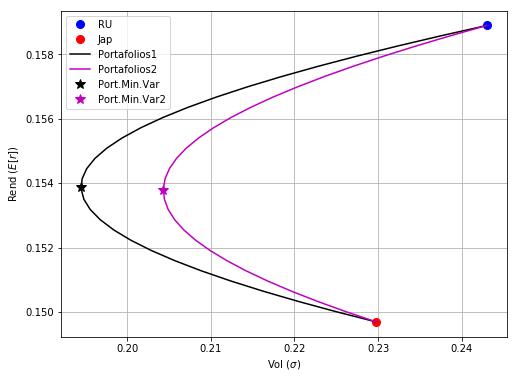

In [57]:
# Graficar el portafolio de varianza mínima
# sobre el mismo gráfico realizado anteriormente
#Plot
plt.figure(figsize=(8,6))
plt.plot(s1,E1,'bo',ms=8, label = 'RU')
plt.plot(s2,E2,'ro',ms=8, label = 'Jap')
plt.plot(portafolios1.Vol,portafolios1.Rend,'k-', ms=10, label = 'Portafolios1') 
plt.plot(portafolios2.Vol,portafolios2.Rend,'m-', ms=10, label = 'Portafolios2') 

plt.plot(np.sqrt(min_var1.fun), min_var1.x*E1 + (1-min_var1.x)*E2, '*k', ms=10, label='Port.Min.Var') #Mínima Var.
plt.plot(np.sqrt(min_var2.fun), min_var2.x*E1 + (1-min_var2.x)*E2, '*m', ms=10, label='Port.Min.Var2') #Mínima Var.

#Axis labels
plt.xlabel('Vol ($\sigma$)')
plt.ylabel('Rend ($E[r]$)')
plt.legend(loc='best')
plt.grid()
plt.show()

2. Concluya acerca de la gráfica de las dos fronteras de mínima varianza. ¿Cuál provee más diversificación?, ¿cómo se diferencian?, ¿son diferentes los pesos de los dos portafolios de varianza mínima en cada caso?, ¿cómo puede explicar esta diferencia? (15 puntos).

In [58]:
[wp1, wp2]

[0.45657763580826571, 0.4442927011099044]

#### Conclusión

En este caso en especifico, ambas proveen una ponderación de portafolios hacia el RU menor que hacia la de Japón. Es decir, el model indica que es preferible invertir mayormente el portafolio en Japón. 

En ambos modelos el portafolio de mínima varianza provee un rendimiento igual, sin embargo, aquél que tiene una correlación mayor presenta una volatilidad mayor (magenta, hacia a derecha) que el primer portafolio (negra), con una volatilidad del 0.3, a comparación del segundo portafolio que tiene una correlación del 0.5. De nuevo esto genera que el portafolio uno tenga mayor diversificación de portafolios, incluso denotado por la longitud mayor alargada que la del portafolio dos. **En el portafolio de mínima variana se le da mayor peso al activo de menor volatilidad.**

La diferencia se puede denotar por la _correlación_, ya que como se explica en la teoría de diversificación de portafolios, se busca que se tengan activos con menores correlaciones para que el movimiento de uno no afecte en misma medida la del otro. Al aumentar su correlación, de la dadas por los datos, a la sintética de 0.5, su correlación aumenta, por lo tanto, los activos responden de maneras más similares y la diversificación disminuye en relación apropiada. 

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>